## Exercise 1: Structuring a given code

### original

In [10]:
file_path = input("Enter the path to the CSV file: ")
records = []
with open(file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        records.append(row)

total = sum(float(record['Grade']) for record in records)
average = total / len(records)

print(f"Average Grade: {average}")
print("--------------------")

filtered_records = [record for record in records if float(record['Grade']) >= 80.0]

print("Student Report")
print("--------------")
for record in filtered_records:
    print(f"Name: {record['Name']}")
    print(f"Grade: {record['Grade']}")
    print("--------------------")


FileNotFoundError: [Errno 2] No such file or directory: ''

### changed

In [ ]:
#code used to load in the csv file
file_path = input("Enter the path to the CSV file: ")
records = []
with open(file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        records.append(row)

#this function return the average grade of all students from the inputted list
def avg_grade(inpt):
    total = sum(float(record['Grade']) for record in inpt)
    return total / len(records)

def avg_grade_print(inpt):
    print(f"Average Grade: {inpt}")
    print("--------------------")

#this function return a list of all students who achieved a grade higher that 80.0
def starstudents(inpt):
    return [item for item in inpt if float(item['Grade']) >= 80.0]

#this function prints the name and grade of all student in the input list
def student_report_print(inpt):
    print("Student Report")
    print("--------------")
    for record in inpt:
        print(f"Name: {record['Name']}")
        print(f"Grade: {record['Grade']}")
        print("--------------------")

#the part of the code that caused the desired values in the records to be found
filtered_records = starstudents(records)
average = avg_grade(records)

#prints the desired values
avg_grade_print(average)
student_report_print(filtered_records)



## Exercise 2: Mandelbrot visualisation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [15]:
#this function makes a mandelbroth set with n amount of iterations using the complex value x+yj (n,x,y)
def mandelbroth(n,x,y):
    c = complex(x,y)
    a=np.array([0])
    for i in range(n):
        a=np.append(a,a[i]**2+c)
    return a

In [18]:
#function that draws a mandelbroth graph of size (x,y)
def draw_mandelbroth(x,y):
    a=np.array([1]*x*y).reshape(x,y)
    ii=-1
    for n1 in np.arange(-1.5,0.5,1/y*2):
        ii+=1
        i=-1
        for n2 in np.arange(-1,1,1/x*2):
            i+=1
            if abs(mandelbroth(101,n1,n2)[100]) < 2:
                a[i,ii]=0
    plt.imshow(a)


C:\Users\olivi\AppData\Local\Temp\ipykernel_11696\3265649701.py:6: RuntimeWarning: overflow encountered in scalar power
  a=np.append(a,a[i]**2+c)
C:\Users\olivi\AppData\Local\Temp\ipykernel_11696\3265649701.py:6: RuntimeWarning: invalid value encountered in scalar power
  a=np.append(a,a[i]**2+c)


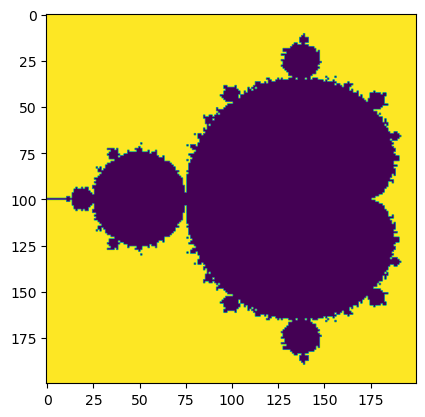

In [19]:
draw_mandelbroth(200,200)

## Exercise 3: Google PageRank algorithm and the worldwide web

In [35]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

### Functions

In [80]:
# creating a function that returns a list that contains the probability of linking the last created node to other nodes
def probability_list(graph):
    # converting the graph into a directed one so we can get the number in_degree of every node 
    graph = nx.DiGraph(graph)
    probability_list1= []
    for i in range(len(list(graph.nodes))-1):
        probability = graph.in_degree(i)/graph.number_of_edges()# p_i= d_i / sum(d_j)
        probability_list1.append(probability)
    return probability_list1

def nodes_to_connect(number_of_edges,available_nodes,graph):
    # randomly selecting number_of_edges nodes for the current node(i) to connect to
    nodes_to_connect = set({}) # since random.choices returns items with replacement, we create a set and then add number_of_edges different nodes
    while len(nodes_to_connect)<number_of_edges:
        sample = random.choices(available_nodes,weights= probability_list(graph),k=1)
        nodes_to_connect.add(sample[0])
    return nodes_to_connect


def adding_nodes_edges(graph,number_of_nodes,number_of_edges):
    #gradually adding the nodes and then connecting each of them to number_of_edges nodes
    for i in range(1,number_of_nodes+1):
        graph.add_node(i)
        #making sure the node doesn't connect to itself
        available_nodes = [n for n in graph.nodes if  n != i]
        for node in nodes_to_connect(number_of_edges,available_nodes,graph):
            graph.add_edge(i,node)
    return graph

def plot_histogram(value_list):
    #plotting a histogram based on a list of values
    plt.hist(value_list,bins=5,edgecolor= 'black')
    plt.title('Distribution of probabilities')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    plt.show()
    
#function returns a dictionary with the keys being the nodes and values being the pagerank sorted from the highest pagerank to the lowest
def page_rank(graph):
    # assuring that the graph is directed
    graph = nx.DiGraph(graph)
    p_r = nx.pagerank(graph)
    page_rank_sorted = {key: value for key, value in sorted(p_r.items(), key=lambda item: item[1], reverse=True)}
    values = page_rank_sorted.values()
    plot_histogram(values)
    return page_rank_sorted


### Exercise 3.1 Drawing a random network

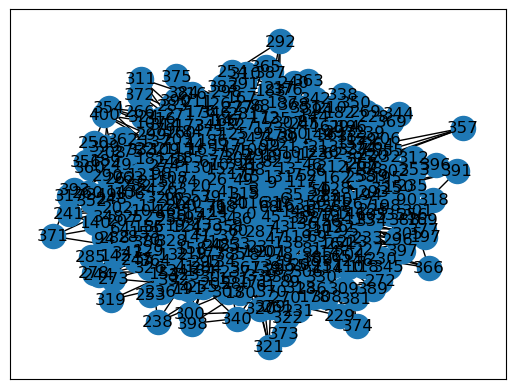

In [68]:
# n0 is the number that the star graph starts with, N is the total number of nodes and M is the number of nodes each node is connected to
n0 = 5
N = 400
M = 4
# Initialising the star graph
G = nx.star_graph(n0)
G = adding_nodes_edges(G,N,M)
# Drawing the graph 
nx.draw_networkx(G,with_labels = True)

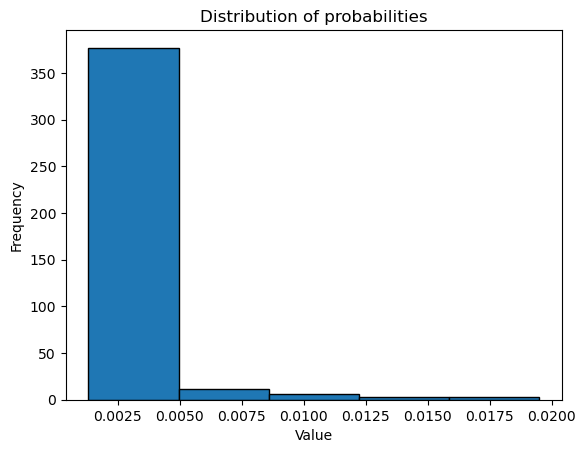

{3: 0.019502702469857896,
 1: 0.019361964113308254,
 4: 0.018055337934581948,
 5: 0.015150797088988352,
 2: 0.012612893331196631,
 17: 0.012433826038517533,
 6: 0.012126632862819942,
 14: 0.012010212517959465,
 13: 0.010288405540661261,
 0: 0.00953325004209349,
 10: 0.009259983649077206,
 16: 0.008715056756562988,
 8: 0.007920950812322577,
 19: 0.007071679641844962,
 18: 0.006975884657440023,
 25: 0.006587395858394243,
 9: 0.006523658603393612,
 49: 0.0063562993880111815,
 15: 0.006349653950480183,
 50: 0.005589093715438223,
 23: 0.005536306152701143,
 29: 0.005465462938200137,
 80: 0.005321827480466285,
 58: 0.005254226241668746,
 11: 0.00489780122908843,
 7: 0.004883353862905927,
 72: 0.004844175820017358,
 63: 0.004815410763331627,
 24: 0.004790414929900891,
 48: 0.004737482569808811,
 76: 0.004723948509408279,
 59: 0.004700436465406811,
 56: 0.004496548551840828,
 35: 0.00437300201687911,
 36: 0.004143018062941823,
 69: 0.004121629862575374,
 43: 0.004089137605881847,
 38: 0.004051

In [81]:
page_rank(G)

### Exercise 3.2 Directed Graph

In [43]:
#reading the file containing the edges
df = pd.read_csv('squirrel_edges.csv')

In [44]:
edges_list = []
for i in range(len(df)):
    edges_list.append((df.iloc[i]['id1'],df.iloc[i]['id2']))
#creating a directed graph from the squirrels edges
squirrel = nx.DiGraph()
squirrel.add_edges_from(edges_list)

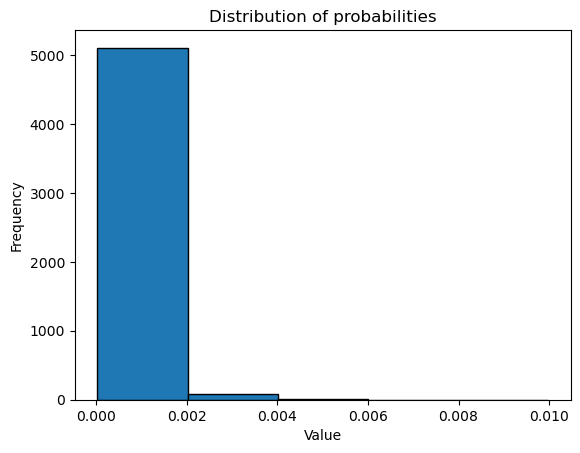

{4346: 0.009979283712248498,
 5112: 0.009220376038570304,
 4903: 0.005819719433929464,
 4365: 0.005399485654994888,
 4303: 0.004767167141636583,
 5095: 0.004557913689188348,
 4758: 0.004226342754458613,
 3852: 0.004113245045520399,
 4419: 0.003783970408377604,
 4544: 0.003606652656414263,
 4796: 0.0035985289923297667,
 5063: 0.0035213849335237494,
 5194: 0.0035064017337215025,
 4730: 0.0033220319859337414,
 4847: 0.0032540432180612226,
 4829: 0.003229867606210302,
 5138: 0.0032091302343977062,
 4275: 0.003184772729167611,
 5164: 0.0031837965730886868,
 3031: 0.0031726133816381403,
 4864: 0.003105961044944604,
 5189: 0.0030349158843942067,
 5033: 0.003020654815127014,
 3980: 0.003002921169537429,
 3462: 0.0029994827137682736,
 5196: 0.002940556353740589,
 4879: 0.002877276262131207,
 4799: 0.002848363520365378,
 5067: 0.0027816774059494925,
 5132: 0.0027696163352627194,
 4943: 0.0027579793661566027,
 3637: 0.0027152699287618155,
 4322: 0.0026943990142214193,
 5102: 0.0026934486417505695

In [82]:
page_rank(squirrel)

In [66]:
page_rank(G)

{3: 0.02191317173057288,
 4: 0.017390221609419807,
 5: 0.013263959602424094,
 2: 0.013256042005288446,
 0: 0.012279152163734285,
 8: 0.01207899710452336,
 7: 0.010694627269798668,
 20: 0.010416632504865507,
 19: 0.00828725932734924,
 1: 0.008256614810936603,
 18: 0.0080783747388591,
 17: 0.007570374797403808,
 55: 0.007115656677714635,
 9: 0.006944755081649572,
 12: 0.006648668359430973,
 11: 0.006041148615972897,
 6: 0.0058931797074984645,
 16: 0.005807451166167067,
 10: 0.005786813624273035,
 29: 0.0057272297782577876,
 43: 0.00566477566675798,
 14: 0.005590455021223771,
 27: 0.005487295970188944,
 47: 0.005455904730402721,
 30: 0.005447642679242965,
 52: 0.0052426224134426765,
 32: 0.00522983982733989,
 21: 0.005096645087260155,
 60: 0.005027558369642995,
 22: 0.004984831882001689,
 33: 0.004888289178635334,
 71: 0.004766486075228102,
 65: 0.004720199209276185,
 31: 0.004648576981937942,
 34: 0.004612049663670077,
 77: 0.0045513522613233924,
 86: 0.004484974241568003,
 38: 0.0044685